In [54]:
import soccerdata as sd
import warnings
warnings.filterwarnings("ignore")

fbref = sd.FBref("ENG-Premier League", "2024-25")
player_stats = fbref.read_player_season_stats(stat_type="shooting")
player_stats = player_stats.reset_index()
player_stats = player_stats.drop(["league","season","team","nation","born"], axis=1)

player_stats.head(10)

[12/21/25 13:15:20] INFO     Saving cached data to C:\Users\Yassine\soccerdata\data\FBref            ]8;id=642636;file://c:\Python310\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=649864;file://c:\Python310\lib\site-packages\soccerdata\_common.py#263\263]8;;\

player    pos age   90s Standard                             \
                                            Gls  Sh SoT  SoT% Sh/90 SoT/90   
0           Ben White     DF  26  13.3        0   9   2  22.2  0.68   0.15   
1         Bukayo Saka  FW,MF  22  19.2        6  66  22  33.3  3.44   1.15   
2          David Raya     GK  28  38.0        0   0   0  <NA>   0.0    0.0   
3         Declan Rice     MF  25  31.4        4  48  14  29.2  1.53   0.45   
4       Ethan Nwaneri  FW,MF  17   9.9        4  24   9  37.5  2.41   0.91   
5       Gabriel Jesus     FW  27   6.8        3  20   7  35.0  2.96   1.04   
6   Gabriel Magalhães     DF  26  26.3        3  22   5  22.7  0.84   0.19   
7  Gabriel Martinelli  FW,MF  23  25.4        8  55  24  43.6  2.16   0.94   
8        Jakub Kiwior     DF  24  12.5        1   3   1  33.3  0.24   0.08   
9            Jorginho     MF  32   7.8        0   2   0   0.0  0.26    0.0   

   ...                         Expected                            
   ... G/SoT  Dist FK PK PKatt       xG npxG npxG/Sh G-xG np:G-xG  
0  ...   0.0  19.4  0  0     0      0.5  0.5    0.05 -0.5    -0.5  
1  ...  0.23  15.6  1  1     1      6.8  6.0    0.09 -0.8    -1.0  
2  ...  <NA>  <NA>  0  0     0      0.0  0.0    <NA>  0.0     0.0  
3  ...  0.29  19.6  2  0     0      3.5  3.5    0.07  0.5     0.5  
4  ...  0.44  18.5  1  0     0      1.2  1.2    0.05  2.8     2.8  
5  ...  0.43  11.1  0  0     0      3.0  3.0    0.15  0.0     0.0  
6  ...   0.6   9.5  0  0     0      2.6  2.6    0.12  0.4     0.4  
7  ...  0.33  12.9  0  0     0      7.4  7.4    0.14  0.6     0.6  
8  ...   1.0  18.5  0  0     0      0.2  0.2    0.06  0.8     0.8  
9  ...  <NA>  23.2  0  0     0      0.1  0.1    0.03 -0.1    -0.1  

[10 rows x 21 columns]

In [9]:
#filter players who played more than 20 matches and drop goalkeepers
filtered_players = player_stats[player_stats['90s'] > 20]
filtered_players = filtered_players[filtered_players['pos'] != 'GK']
filtered_players = filtered_players.sort_values(by='90s', ascending=False)


#fill NA values with 0
filtered_players = filtered_players.fillna(0)

filtered_players.head(20)

player    pos age   90s Standard                              \
                                             Gls   Sh SoT  SoT% Sh/90 SoT/90   
101     Nathan Collins     DF  23  38.0        2   17   6  35.3  0.45   0.16   
83        Bryan Mbeumo     FW  24  37.9       20   79  34  43.0  2.08    0.9   
334      Mohamed Salah     FW  32  37.5       29  121  50  41.3  3.23   1.33   
157     Moisés Caicedo  MF,DF  22  37.2        1   20   3  15.0  0.54   0.08   
534         Max Kilman     DF  27  37.2        0   13   2  15.4  0.35   0.05   
75        Milos Kerkez     DF  20  37.1        2   19   5  26.3  0.51   0.13   
337    Virgil van Dijk     DF  33  37.0        3   27   8  29.6  0.73   0.22   
405           Dan Burn     DF  32  37.0        1   23   7  30.4  0.62   0.19   
441  Nikola Milenković     DF  26  37.0        5   29   8  27.6  0.78   0.22   
351     Joško Gvardiol     DF  22  36.4        5   40  12  30.0   1.1   0.33   
403    Bruno Guimarães     MF  26  36.3        5   45  13  28.9  1.24   0.36   
179       Daniel Muñoz     DF  28  35.9        4   37  14  37.8  1.03   0.39   
55     Antoine Semenyo     FW  24  35.6       11  125  40  32.0  3.51   1.12   
145        Cole Palmer  MF,FW  22  35.5       15  121  44  36.4  3.41   1.24   
438            Murillo     DF  22  35.4        2   25   6  24.0  0.71   0.17   
229   Antonee Robinson     DF  26  35.2        0   16   2  12.5  0.45   0.06   
335   Ryan Gravenberch     MF  22  35.1        0   20   5  25.0  0.57   0.14   
152       Levi Colwill     DF  21  35.0        2   17   4  23.5  0.49   0.11   
516  Aaron Wan-Bissaka     DF  26  35.0        2   16   5  31.3  0.46   0.14   
263        Dara O'Shea     DF  25  34.7        0   22   2   9.1  0.63   0.06   

     ...                          Expected                             
     ... G/SoT  Dist  FK PK PKatt       xG  npxG npxG/Sh G-xG np:G-xG  
101  ...  0.33  10.7   0  0     0      2.5   2.5    0.15 -0.5    -0.5  
83   ...  0.44  17.9   6  5     6     12.3   7.5     0.1  7.7     7.5  
334  ...   0.4  14.5   1  9     9     25.2  18.2    0.15  3.8     1.8  
157  ...  0.33  25.3   0  0     0      0.8   0.8    0.04  0.2     0.2  
534  ...   0.0   8.9   0  0     0      1.6   1.6    0.13 -1.6    -1.6  
75   ...   0.4  20.2   0  0     0      0.6   0.5    0.03  1.4     1.5  
337  ...  0.38  13.1   1  0     0      2.2   2.2    0.08  0.8     0.8  
405  ...  0.14   9.7   0  0     0      2.0   2.0    0.09 -1.0    -1.0  
441  ...  0.63  11.6   0  0     0      4.0   4.0    0.14  1.0     1.0  
351  ...  0.42  12.9   0  0     0      4.6   4.3    0.11  0.4     0.7  
403  ...  0.38  16.4   0  0     0      4.3   4.3     0.1  0.7     0.7  
179  ...  0.29  12.7   0  0     0      4.9   4.9    0.13 -0.9    -0.9  
55   ...  0.28  17.0   0  0     0     10.0  10.0    0.08  1.0     1.0  
145  ...  0.25  20.4  12  4     5     17.3  13.3    0.11 -2.3    -2.3  
438  ...  0.33  21.9   3  0     0      1.4   1.4    0.06  0.6     0.6  
229  ...   0.0  22.1   0  0     0      0.7   0.7    0.04 -0.7    -0.7  
335  ...   0.0  24.5   0  0     0      1.1   1.1    0.06 -1.1    -1.1  
152  ...   0.5   9.5   0  0     0      1.9   1.9    0.11  0.1     0.1  
516  ...   0.4  15.1   0  0     0      1.2   1.2    0.07  0.8     0.8  
263  ...   0.0  13.6   0  0     0      1.3   1.3    0.06 -1.3    -1.3  

[20 rows x 21 columns]

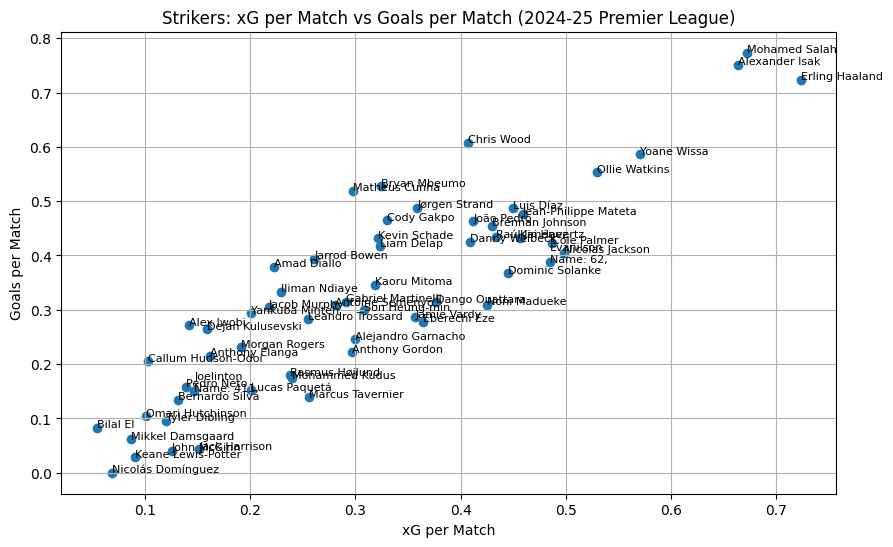

In [ ]:
#lets analyze only strikers
strikers = filtered_players[filtered_players['pos'].str.contains('FW')]

#add goals per match column and Xg per match column
strikers['goals_per_match'] = strikers.Standard["Gls"] / strikers['90s']
strikers['xg_per_match'] = strikers.Expected["xG"] / strikers['90s']

#scatter plot of xg per match vs goals per match by player
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(strikers['xg_per_match'], strikers['goals_per_match'])
for i, pl in strikers.iterrows():
    temp = str(pl.player).split(" ")[4:6]
    plt.text(pl['xg_per_match'], pl['goals_per_match'], temp[0] + " " + temp[1].split("\n")[0], fontsize=8)
plt.xlabel('xG per Match')
plt.ylabel('Goals per Match')   
plt.title('Strikers: xG per Match vs Goals per Match (2024-25 Premier League)')
plt.grid()  
plt.show()


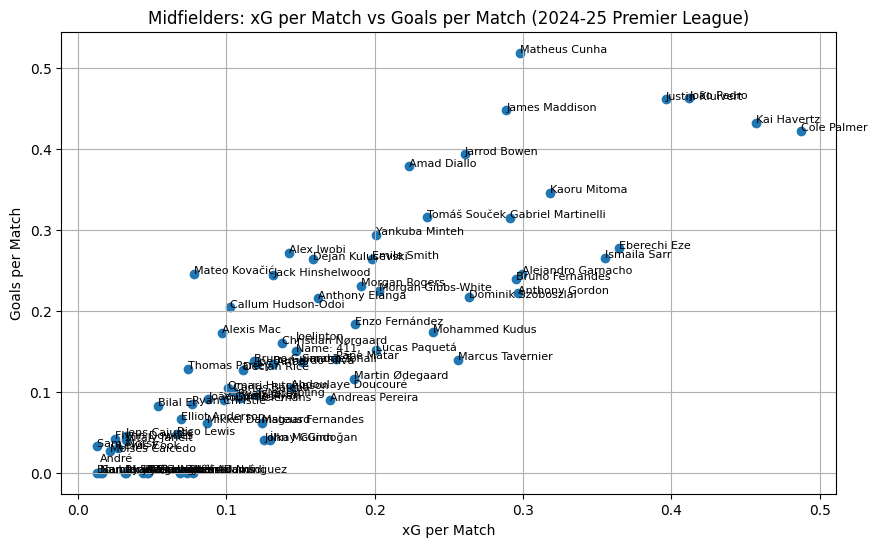

In [70]:
#lets do the same thing with midfielders
midfielders = filtered_players[filtered_players['pos'].str.contains('MF')] 
midfielders['goals_per_match'] = midfielders.Standard["Gls"] / midfielders['90s']
midfielders['xg_per_match'] = midfielders.Expected["xG"] / midfielders['90s']
plt.figure(figsize=(10,6))
plt.scatter(midfielders['xg_per_match'], midfielders['goals_per_match'])
for i, pl in midfielders.iterrows():
    temp = str(pl.player).split(" ")[4:6]
    plt.text(pl['xg_per_match'], pl['goals_per_match'], temp[0] + " " + temp[1].split("\n")[0], fontsize=8)
plt.xlabel('xG per Match')
plt.ylabel('Goals per Match')
plt.title('Midfielders: xG per Match vs Goals per Match (2024-25 Premier League)')
plt.grid()
plt.show()
